In [2]:
## Imported Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [3]:
## Loading training data

train = pd.read_csv('/content/drive/MyDrive/training_new.csv')

In [4]:
## Checking top rows

train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [5]:
## removing Event ID column

train = train[['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_jet_num','Weight','Label']]

In [6]:
train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,Weight,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,2,0.002653,s
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,1,2.233584,b
2,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,1,2.347389,b
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,0,5.446378,b
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,0,6.245333,b


In [7]:
train['DER_mass_MMC'] = train['DER_mass_MMC'].replace(-999.000,105)

<ipython-input-7-e4967d722b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DER_mass_MMC'] = train['DER_mass_MMC'].replace(-999.000,105)


<Axes: xlabel='DER_mass_MMC', ylabel='Density'>

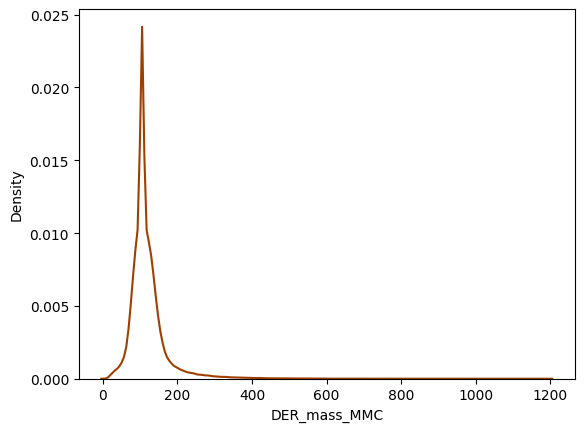

In [8]:
sns.kdeplot(train['DER_mass_MMC'],color='#9E3F00')

In [9]:
X = train.drop(columns=['Weight','Label'])
y= train['Label']

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

# from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

In [12]:
print(X_train.shape)

(187500, 18)


In [13]:
print(y_train.shape)

(187500,)


In [14]:
scaler = MinMaxScaler()

In [15]:
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
y_train = y_train.replace({'b':0,'s':1})
y_test = y_test.replace({'b':0,'s':1})

In [17]:
X_test

array([[0.09900573, 0.09810865, 0.05583378, ..., 0.19704822, 0.59086569,
        0.66666667],
       [0.13400288, 0.09621043, 0.07531969, ..., 0.04014507, 0.15897518,
        0.33333333],
       [0.08283812, 0.06060901, 0.05299318, ..., 0.03018646, 0.44191598,
        0.33333333],
       ...,
       [0.08111366, 0.12315317, 0.00305207, ..., 0.06879568, 0.60757479,
        0.        ],
       [0.10203198, 0.10233813, 0.07766515, ..., 0.04300395, 0.43889243,
        0.        ],
       [0.07520655, 0.08129314, 0.0387529 , ..., 0.02174357, 0.39338001,
        0.        ]])

In [18]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
import time

In [20]:
pip install catboost

In [21]:
classifiers = {
    'Logistic Regression':(LogisticRegression()),
    'Random Forest': (RandomForestClassifier()),
    'Gradient Boosting': (GradientBoostingClassifier()),
    'XGBoost': (XGBClassifier()),
    'CatBoost': (CatBoostClassifier(verbose=0)),
    'GBM': (GradientBoostingClassifier()),
    'SGD': (SGDClassifier()),
    'LightGBM': (LGBMClassifier()),
    'Logistic': (LogisticRegression()),
    'LinearSVC': (LinearSVC()),
    'KNN': (KNeighborsClassifier(n_neighbors=5)),

}

In [22]:
# for clf_name, clf in classifiers.items():
#   print(f'------{clf_name}-------')
#   start_time = time.time()
#   clf.fit(X_train, y_train)
#   y_pred = clf.predict(X_test)
#   accuracy = accuracy_score(y_test, y_pred)
# # Calculate recall
#   recall = recall_score(y_test, y_pred, average='binary',pos_label = 1)  # For binary classification
# # Calculate precision
#   precision = precision_score(y_test, y_pred, average='binary',pos_label = 1)  # For binary classification

#   print('Accuracy:', accuracy)
#   print('Precision:', precision)
#   print('Recall:', recall)

#     # Display classification report
#   print('Classification Report:')
#   target_names_label=['s', 'b']
#   print(classification_report(y_test, y_pred))
#   end_time = time.time()
#   elapsed_time = end_time - start_time
#   print(elapsed_time)

In [70]:
xgb = XGBClassifier().fit(X_train,y_train)

In [76]:
test = pd.read_csv('/content/drive/MyDrive/test_new.csv')

In [77]:
test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [78]:
test.shape

(550000, 31)

In [79]:
test = test[['EventId','DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt','DER_pt_ratio_lep_tau','DER_met_phi_centrality','PRI_tau_pt','PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi','PRI_jet_num']]

In [80]:
test['contains_minus_999'] = test.isin([-999.00]).any(axis=1)

In [81]:
test[test['contains_minus_999']==True]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,contains_minus_999
0,350000,-999.0,79.589,23.916,3.036,0.903,3.036,56.018,1.536,-1.404,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,0,True
14,350014,-999.0,79.311,15.349,17.677,0.551,17.677,55.219,1.170,-0.492,25.442,-1.388,-0.512,29.777,-0.903,-0.771,53.386,2.163,0,True
15,350015,-999.0,73.115,45.672,3.563,1.774,3.563,58.775,1.553,-1.354,23.024,-0.603,-2.650,35.750,-0.070,-0.958,39.999,1.666,0,True
30,350030,-999.0,80.127,52.958,0.930,1.715,0.930,65.697,1.213,-1.406,29.690,0.301,2.820,36.006,-0.567,1.340,49.522,-1.159,0,True
34,350034,-999.0,94.624,55.518,44.153,1.163,14.473,125.116,1.105,-0.467,42.980,0.422,-0.346,47.502,1.578,-0.218,47.839,2.679,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549980,899980,-999.0,72.502,89.382,1.749,2.983,1.749,61.780,1.938,-1.332,21.026,1.046,-0.858,40.754,-1.053,1.262,34.289,-2.373,0,True
549981,899981,-999.0,92.588,241.316,28.720,3.293,28.720,111.654,0.769,-1.345,63.116,1.743,-1.280,48.538,-1.211,-2.735,57.604,1.415,0,True
549984,899984,-999.0,80.726,75.646,0.700,2.328,0.700,83.950,1.490,-1.386,33.716,-0.564,-0.806,50.233,-0.502,1.521,37.073,-2.344,0,True
549993,899993,-999.0,99.822,15.488,5.828,0.451,4.565,178.750,1.040,-1.315,33.547,-1.817,0.598,34.876,-2.136,0.280,71.590,-2.766,2,True


In [82]:
test[test['DER_mass_MMC']==-999.0]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,contains_minus_999
0,350000,-999.0,79.589,23.916,3.036,0.903,3.036,56.018,1.536,-1.404,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,0,True
14,350014,-999.0,79.311,15.349,17.677,0.551,17.677,55.219,1.170,-0.492,25.442,-1.388,-0.512,29.777,-0.903,-0.771,53.386,2.163,0,True
15,350015,-999.0,73.115,45.672,3.563,1.774,3.563,58.775,1.553,-1.354,23.024,-0.603,-2.650,35.750,-0.070,-0.958,39.999,1.666,0,True
30,350030,-999.0,80.127,52.958,0.930,1.715,0.930,65.697,1.213,-1.406,29.690,0.301,2.820,36.006,-0.567,1.340,49.522,-1.159,0,True
34,350034,-999.0,94.624,55.518,44.153,1.163,14.473,125.116,1.105,-0.467,42.980,0.422,-0.346,47.502,1.578,-0.218,47.839,2.679,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549980,899980,-999.0,72.502,89.382,1.749,2.983,1.749,61.780,1.938,-1.332,21.026,1.046,-0.858,40.754,-1.053,1.262,34.289,-2.373,0,True
549981,899981,-999.0,92.588,241.316,28.720,3.293,28.720,111.654,0.769,-1.345,63.116,1.743,-1.280,48.538,-1.211,-2.735,57.604,1.415,0,True
549984,899984,-999.0,80.726,75.646,0.700,2.328,0.700,83.950,1.490,-1.386,33.716,-0.564,-0.806,50.233,-0.502,1.521,37.073,-2.344,0,True
549993,899993,-999.0,99.822,15.488,5.828,0.451,4.565,178.750,1.040,-1.315,33.547,-1.817,0.598,34.876,-2.136,0.280,71.590,-2.766,2,True


In [83]:
test['DER_mass_MMC'] = test['DER_mass_MMC'].replace(-999.000,105)

In [84]:
test.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_jet_num                    0
contains_minus_999             0
dtype: int64

In [91]:
# test.drop(columns=['contains_minus_999'],inplace=True)
# test.drop(columns=['label'],inplace=True)

In [86]:
test_inputs = test.drop(columns=['EventId'])

In [87]:
test['label'] = xgb.predict(test_inputs)

In [88]:
test[test['label']==1]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_num,label
1,350001,106.398,67.490,87.949,49.994,2.048,2.679,132.865,1.777,-1.204,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,1,1
4,350004,74.159,82.772,58.731,89.646,1.028,77.213,721.552,1.713,-0.913,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,3,1
12,350012,96.033,43.116,59.270,5.141,3.131,5.141,59.419,1.690,1.404,22.090,-0.987,-0.222,37.329,-0.481,2.972,12.633,-0.412,0,1
14,350014,105.000,79.311,15.349,17.677,0.551,17.677,55.219,1.170,-0.492,25.442,-1.388,-0.512,29.777,-0.903,-0.771,53.386,2.163,0,1
17,350017,40.383,76.439,34.996,59.543,0.900,59.543,81.392,2.216,-0.244,25.310,-1.445,0.296,56.081,-2.308,0.044,27.735,2.687,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549970,899970,105.000,98.045,48.381,20.253,1.503,39.684,118.410,2.508,-1.407,20.086,2.421,2.424,50.383,1.305,1.418,51.631,-1.164,1,1
549985,899985,62.383,55.397,53.396,48.620,1.531,48.620,81.206,1.950,-1.064,27.526,-2.327,2.551,53.681,-2.484,1.028,14.308,-2.047,0,1
549988,899988,101.833,61.419,43.571,196.527,1.050,95.102,334.494,1.792,1.180,31.651,-1.053,0.381,56.714,-0.512,1.281,120.993,0.522,3,1
549993,899993,105.000,99.822,15.488,5.828,0.451,4.565,178.750,1.040,-1.315,33.547,-1.817,0.598,34.876,-2.136,0.280,71.590,-2.766,2,1


In [90]:
test[['EventId','label']].to_csv('submission.csv')